Задача 2.

In [467]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import skew as skew_func

In [468]:
# устанавливаем объем выборки
n = 25
# создаем выборку
sample = np.random.exponential(scale=1, size=n)
sample_sorted = np.sort(sample)
print("Получена следующая выборка (отсортирована по возрастанию):")
print(sample_sorted)


Получена следующая выборка (отсортирована по возрастанию):
[0.01233019 0.01532939 0.14635686 0.17800318 0.27610668 0.45767471
 0.45817202 0.54002421 0.54102629 0.54980017 0.59550844 0.62398207
 0.67494857 0.69903193 0.73482334 0.75788894 0.91878378 1.15263512
 1.30130126 1.37648669 1.46118297 1.76593171 2.92150321 3.34559258
 3.36573277]


Пункт a)

In [469]:
# вычисляем медиану
median = np.median(sample_sorted)
print(f"Медиана = {median}")

Медиана = 0.6749485688129582


In [470]:
# Вычисляем размах
min_el = np.min(sample_sorted)
max_el = np.max(sample_sorted)

width = max_el - min_el

print (f"Размах = {width}") 

Размах = 3.3534025771810456


In [471]:
# расчет коэффициента ассиметрии
mu_2 = np.mean((sample - np.mean(sample))**2) # 2 центральный момент
mu_3 = np.mean((sample - np.mean(sample))**3) # 3 центральный момент

asm_koef = mu_3/(mu_2**1.5)
print(f"Коэффициент симметрии = {asm_koef}")

Коэффициент симметрии = 1.4932592377435456


In [472]:
values, counts = np.unique(sample, return_counts=True)
max_count = np.max(counts)
modes = values[counts == max_count]

if (modes.size == counts.size):
    print("Все элементы являются модой")
else: 
    for m in modes:
        print(f"Модой являtтся: {m}\n")


Все элементы являются модой


Пункт b)

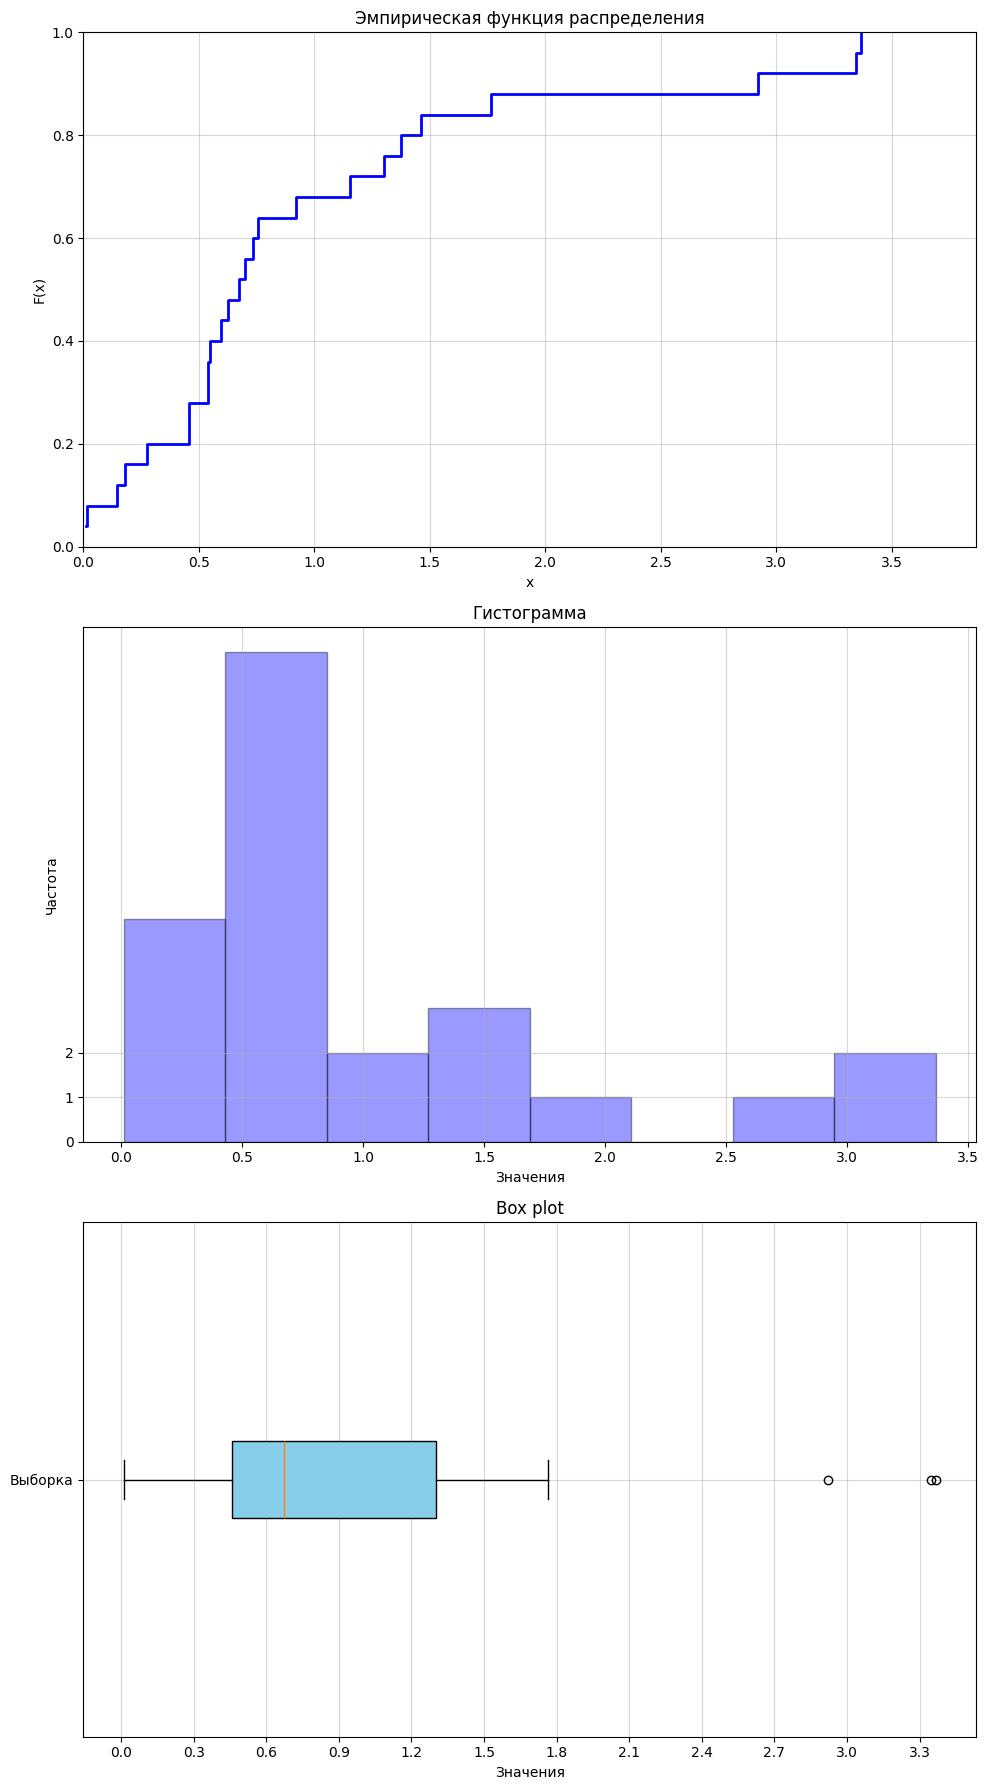

Основные статистики:
Медиана: 0.675
Квартили: Q1=0.458, Q3=1.301
Минимум: 0.012, Максимум: 3.366


In [481]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# 1. Эмпирическая функция распределения
ax = axes[0]
# Значения ЭФР: от 0 до 1 с шагом 1/n
y = np.arange(1, n+1) / n

# Рисуем ступенчатую функцию
ax.step(sample_sorted, y, where='post', color='blue', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('Эмпирическая функция распределения')
ax.grid(True, alpha=0.5)
ax.set_xlim(0, max(sample) + 0.5)
ax.set_ylim(0, 1)

# ===== 2. Гистограмма =====
ax = axes[1]
ax.hist(sample, bins=8, alpha=0.4, color='blue', edgecolor='black')
ax.set_xlabel('Значения')
ax.set_ylabel('Частота')
ax.set_yticks(np.arange(0, max(counts) + 2, 1))
ax.set_title('Гистограмма')
ax.grid(True, alpha=0.5)

# ===== 3. Box plot =====
ax = axes[2]
box = ax.boxplot(sample, patch_artist=True, vert=False)
box['boxes'][0].set_facecolor('skyblue')
ax.set_yticklabels(['Выборка'])
ax.set_xlabel('Значения')
ax.set_xticks(np.arange(0, np.max(sample)+0.1, 0.3))
ax.set_title('Box plot')
ax.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

# Выводим основные статистики
print("Основные статистики:")
print(f"Медиана: {np.median(sample):.3f}")
print(f"Квартили: Q1={np.percentile(sample, 25):.3f}, Q3={np.percentile(sample, 75):.3f}")
print(f"Минимум: {np.min(sample):.3f}, Максимум: {np.max(sample):.3f}")

Пункт с)

In [474]:
### Оценка среднего ###
# ЦПТ
mean_sample = np.mean(sample)
std_sample = np.std(sample, ddof=1)

cpt_mean = mean_sample
cpt_std = std_sample / np.sqrt(n)

# 2. Bootstrap
n_bootstrap = 1000
bootstrap_means = []

for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

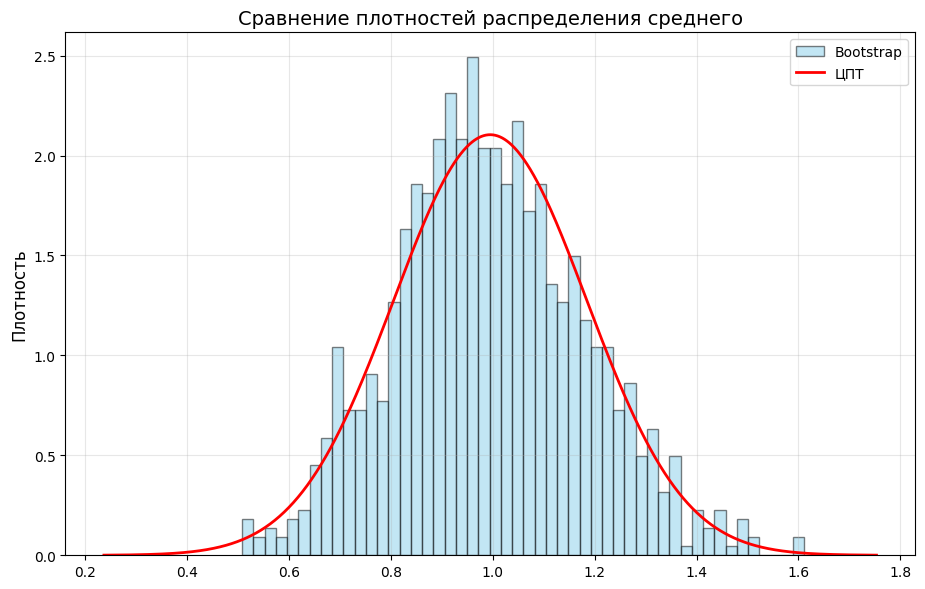

In [475]:
# Visiualisation(Bootstrap + ЦПТ)
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

x_range = np.linspace(min(bootstrap_means), max(bootstrap_means), 200)

# Bootstrap-средних
plt.hist(bootstrap_means, bins=50, density=True, alpha=0.5, 
         color='skyblue', edgecolor='black', label='Bootstrap')

# ЦПТ кривая
x_optimal = np.linspace(cpt_mean - 4*cpt_std, cpt_mean + 4*cpt_std, 1000)
y_optimal = (1 / (cpt_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_optimal - cpt_mean) / cpt_std)**2)
plt.plot(x_optimal, y_optimal, 'r-', linewidth=2, label='ЦПТ')


plt.title('Сравнение плотностей распределения среднего', fontsize=14)
plt.ylabel('Плотность', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Пункт d)

In [476]:
print(f"Ранее полученный коэффициент ассиметрии = {asm_koef:.4f}")

# Bootstrap
n_bootstrap = 1000
bootstrap_skews = []

for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    bootstrap_skews.append(skew_func(bootstrap_sample, bias=False))

bootstrap_skews = np.array(bootstrap_skews)

# Средний коэффициент асимметрии
mean_bootstrap_skew = np.mean(bootstrap_skews)
print(f"Средний коэффициент асимметрии по бутстрапу: {mean_bootstrap_skew:.4f}")

# P(коэффициент асимметрии < 1)
prob = np.mean(bootstrap_skews < 1)
print(f"Вероятность P(коэффициент асимметрии < 1) = {prob:.4f}")

Ранее полученный коэффициент ассиметрии = 1.4933
Средний коэффициент асимметрии по бутстрапу: 1.5379
Вероятность P(коэффициент асимметрии < 1) = 0.1220


Пункт е)

In [477]:
# Bootstrap
bootstrap_medians = []

for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    bootstrap_medians.append(np.median(bootstrap_sample))

bootstrap_medians = np.array(bootstrap_medians)

# Теоретическая плотность распределения медианы
theoretical_median = np.log(2)
asymptotic_std = 1 / (2 * np.sqrt(n))  # стандартное отклонение для exp(1)

# Создаем диапазон значений для отображения плотностей
x_median = np.linspace(min(bootstrap_medians), max(bootstrap_medians), 200)

# Плотность распределения медианы (асимптотическая нормальная)
median_density = stats.norm.pdf(x_median, loc=theoretical_median, scale=asymptotic_std)

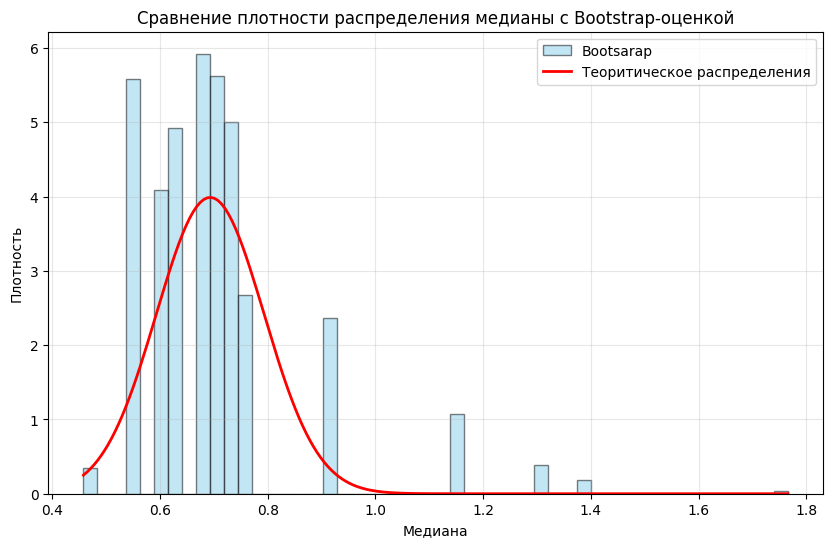

In [478]:
# Визуализация
plt.figure(figsize=(10, 6))

# Bootstrap
plt.hist(bootstrap_medians, bins=50, density=True, alpha=0.5, 
         color='skyblue', edgecolor='black', label='Bootsarap')

# Теоретическая плотность
plt.plot(x_median, median_density, 'r-', linewidth=2, 
         label="Теоритическое распределения")

plt.xlabel('Медиана')
plt.ylabel('Плотность')
plt.title('Сравнение плотности распределения медианы с Bootstrap-оценкой')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()